In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from scipy.stats import sem
import scikit_posthocs as sp

sc._settings.ScanpyConfig(n_jobs=-1)

In [19]:
# Specify the path to your Helvetica Neue Regular font file
helvetica_neue_path = "/home/mstier/.local/share/fonts/HelveticaNeue-Regular.ttf"

# Create a FontProperties object using the font path
prop_neue = fm.FontProperties(fname=helvetica_neue_path)

# Get the font name from FontProperties
helvetica_neue_name = prop_neue.get_name()

# Define custom context for font sizes and line thickness using Seaborn
custom_context = {
    'font.size': 7,                    # General font size for the plot
    'axes.labelsize': 7,               # Font size for axis labels
    'axes.titlesize': 7,               # Font size for titles
    'legend.fontsize': 7,              # Font size for legend
    'axes.linewidth': 0.6,             # Line width for axes spines
    'grid.linewidth': 0.6,             # Line width for grid lines
    'lines.linewidth': 0.6,            # Line width for plot lines
    'lines.markersize': 3,             # Size of markers in scatter/line plots
    'patch.linewidth': 0.6,            # Line width for boxplot edges
    'xtick.major.size': 3,             # Length of major ticks on x-axis
    'ytick.major.size': 3,             # Length of major ticks on y-axis
    'xtick.labelsize': 7,              # Font size for x-tick labels
    'ytick.labelsize': 7,              # Font size for y-tick labels
    'legend.title_fontsize': 7,        # Font size for legend title
}

# Define custom style for aesthetic elements like background, grid, and spines using Seaborn
custom_style = {
    'axes.facecolor': 'white',         # Background color of the axes
    'axes.edgecolor': 'black',         # Color of the border around the plot
    'axes.grid': False,                # Disable gridlines
    'grid.color': '#EAEAEA',           # Color of grid lines
    'grid.linestyle': '--',            # Style of the grid lines (dashed)
    'xtick.color': 'black',            # Color of x-axis tick labels
    'ytick.color': 'black',            # Color of y-axis tick labels
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.direction': 'out',          # Direction of x-axis ticks
    'ytick.direction': 'out',          # Direction of y-axis ticks
    'axes.spines.left': True,          # Show the left spine (border)
    'axes.spines.bottom': True,        # Show the bottom spine (border)
    'axes.spines.right': False,        # Hide the right spine
    'axes.spines.top': False,          # Hide the top spine
}

# Use set_theme and pass rc with font settings
sns.set_theme(
    context=custom_context,
    style=custom_style,
    rc={
        'font.family': 'sans-serif',                   # Set family to sans-serif
        'font.sans-serif': [helvetica_neue_name],      # Specify Helvetica Neue as the sans-serif font
        'font.size': 7,                                # General font size for the plot
        'axes.labelsize': 7,                           # Font size for axis labels
        'axes.titlesize': 7,                           # Font size for titles
        'legend.fontsize': 7,                          # Font size for legend
        'xtick.labelsize': 7,                          # Font size for x-tick labels
        'ytick.labelsize': 7                           # Font size for y-tick labels
    }
)

plt.rcParams['svg.fonttype'] = 'none'

In [20]:
# Set the base output directory for all figures
output_dir = '/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure3/'

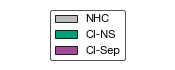

In [21]:
# Define the groups and corresponding colors
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Create a custom legend
legend_elements = [Patch(facecolor=group_palette[group], edgecolor='black', label=group) for group in group_order]

# Create a new figure for the legend
fig, ax = plt.subplots(figsize=(2, 0.5))

# Hide axes
ax.axis('off')

# Add the legend to the figure
ax.legend(handles=legend_elements, loc='center', frameon=True, fontsize=8, edgecolor='black')

# Save the legend as a separate image file
plt.savefig('custom_legend.svg', format='svg')

# Show the legend
plt.show()

In [12]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure3/Restim-Tconv.csv')
print(df.iloc[:6, :6])

   SampleID Group  pct_ifng  delta_pct_ifng  mfi_ifng  delta_mfi_ifng
0  NHC-0001   NHC      3.54      -64.971751     11.90       -0.840336
1  NHC-0002   NHC      3.13      -50.798722     13.70       -7.299270
2  NHC-0003   NHC      2.60      -63.846154     14.20      -18.309859
3  NHC-0004   NHC      1.49      -29.530201     10.30       -3.495146
4  NHC-0005   NHC      0.92      -26.086957      9.06       11.479029
5  NHC-0006   NHC     10.30      -51.067961     11.30       46.902655


TNFα - Kruskal-Wallis H-statistic: 4.95, p-value: 0.0843
TNFα - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.131321
CI-Sep  1.000000  1.000000  0.162252
NHC     0.131321  0.162252  1.000000



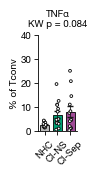

IFNγ - Kruskal-Wallis H-statistic: 3.53, p-value: 0.1710
IFNγ - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.282554  0.390008
CI-Sep  0.282554  1.000000  1.000000
NHC     0.390008  1.000000  1.000000



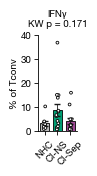

IL-4 - Kruskal-Wallis H-statistic: 14.68, p-value: 0.0007
IL-4 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.710854  0.019111
CI-Sep  0.710854  1.000000  0.000493
NHC     0.019111  0.000493  1.000000



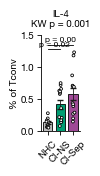

IL-17A - Kruskal-Wallis H-statistic: 7.60, p-value: 0.0224
IL-17A - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.113726
CI-Sep  1.000000  1.000000  0.022276
NHC     0.113726  0.022276  1.000000



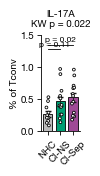

IL-2 - Kruskal-Wallis H-statistic: 11.57, p-value: 0.0031
IL-2 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.029314
CI-Sep  1.000000  1.000000  0.002962
NHC     0.029314  0.002962  1.000000



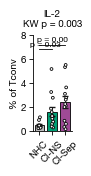

In [69]:
# Define the columns of interest and their labels
cytokines = {
    'pct_tnfa': ('TNFα', 0, 40, 10),
    'pct_ifng': ('IFNγ', 0, 40, 10),
    'pct_il4': ('IL-4', 0, 1.5, 0.5),
    'pct_il17a': ('IL-17A', 0, 1.5, 0.5),
    'pct_il2': ('IL-2', 0, 8, 2)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each cytokine to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in cytokines.items():
    # Subset data for the current cytokine
    subset = df[['Group', col]].copy()
    subset = subset.rename(columns={col: 'Percent'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['Percent'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='Percent', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('% of Tconv', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on cytokine
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.10
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Tconv_{label}_percent.svg', format='svg')

    # Show the figure
    plt.show()

TNFα - Kruskal-Wallis H-statistic: 15.37, p-value: 0.0005
TNFα - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.441921  0.027356
CI-Sep  0.441921  1.000000  0.000296
NHC     0.027356  0.000296  1.000000



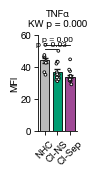

IFNγ - Kruskal-Wallis H-statistic: 5.43, p-value: 0.0661
IFNγ - Dunn’s Post-hoc Test Results:
           CI-NS   CI-Sep       NHC
CI-NS   1.000000  1.00000  0.095271
CI-Sep  1.000000  1.00000  0.144590
NHC     0.095271  0.14459  1.000000



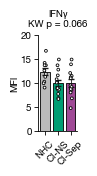

IL-4 - Kruskal-Wallis H-statistic: 1.18, p-value: 0.5550
IL-4 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep  NHC
CI-NS   1.000000  0.834176  1.0
CI-Sep  0.834176  1.000000  1.0
NHC     1.000000  1.000000  1.0



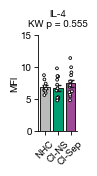

IL-17A - Kruskal-Wallis H-statistic: 0.18, p-value: 0.9121
IL-17A - Dunn’s Post-hoc Test Results:
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



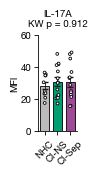

IL-2 - Kruskal-Wallis H-statistic: 5.09, p-value: 0.0785
IL-2 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.207446
CI-Sep  1.000000  1.000000  0.097581
NHC     0.207446  0.097581  1.000000



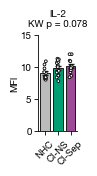

In [73]:
# Define the columns of interest and their labels with initial y-axis settings
cytokines_mfi = {
    'mfi_tnfa': ('TNFα', 0, 60, 20),
    'mfi_ifng': ('IFNγ', 0, 20, 5),
    'mfi_il4': ('IL-4', 0, 15, 5),
    'mfi_il17a': ('IL-17A', 0, 60, 20),
    'mfi_il2': ('IL-2', 0, 15, 5)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each cytokine to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in cytokines_mfi.items():
    # Subset data for the current cytokine
    subset = df[['Group', col]].copy()
    subset = subset.rename(columns={col: 'MFI'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['MFI'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='MFI', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('MFI', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on cytokine
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['MFI'],
        subset[subset['Group'] == 'CI-NS']['MFI'],
        subset[subset['Group'] == 'CI-Sep']['MFI']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Tconv_{label}_mfi.svg', format='svg')

    # Show the figure
    plt.show()

CD25 - Kruskal-Wallis H-statistic: 16.93, p-value: 0.0002
CD25 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.001208
CI-Sep  1.000000  1.000000  0.000529
NHC     0.001208  0.000529  1.000000



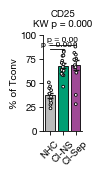

PD-1 - Kruskal-Wallis H-statistic: 23.04, p-value: 0.0000
PD-1 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.254531  0.003662
CI-Sep  0.254531  1.000000  0.000006
NHC     0.003662  0.000006  1.000000



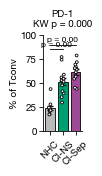

LAG-3 - Kruskal-Wallis H-statistic: 22.96, p-value: 0.0000
LAG-3 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.600589  0.001138
CI-Sep  0.600589  1.000000  0.000009
NHC     0.001138  0.000009  1.000000



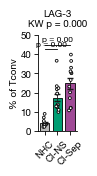

In [79]:
# Define the columns of interest and their labels
functional_markers = {
    'pct_cd25': ('CD25', 0, 100, 25),
    'pct_pd1': ('PD-1', 0, 100, 25),
    'pct_lag3': ('LAG-3', 0, 50, 10)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each functional marker to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in functional_markers.items():
    # Subset data for the current functional marker
    subset = df[['Group', col]].copy()
    subset = subset.rename(columns={col: 'Percent'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['Percent'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='Percent', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('% of Tconv', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on functional marker
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Tconv_{label}_percent.svg', format='svg')

    # Show the figure
    plt.show()

CD25 - Kruskal-Wallis H-statistic: 8.78, p-value: 0.0124
CD25 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.029998
CI-Sep  1.000000  1.000000  0.022262
NHC     0.029998  0.022262  1.000000



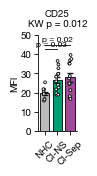

PD-1 - Kruskal-Wallis H-statistic: 14.79, p-value: 0.0006
PD-1 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.400032  0.037925
CI-Sep  0.400032  1.000000  0.000386
NHC     0.037925  0.000386  1.000000



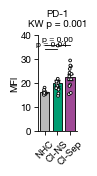

LAG-3 - Kruskal-Wallis H-statistic: 6.68, p-value: 0.0354
LAG-3 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.054512
CI-Sep  1.000000  1.000000  0.080089
NHC     0.054512  0.080089  1.000000



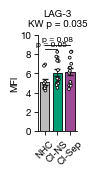

In [81]:
# Define the columns of interest and their labels with initial y-axis settings
functional_markers_mfi = {
    'mfi_cd25': ('CD25', 0, 50, 10),
    'mfi_pd1': ('PD-1', 0, 40, 10),
    'mfi_lag3': ('LAG-3', 0, 10, 2)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each functional marker to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in functional_markers_mfi.items():
    # Subset data for the current functional marker
    subset = df[['Group', col]].copy()
    subset = subset.rename(columns={col: 'MFI'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['MFI'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='MFI', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('MFI', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on functional marker
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['MFI'],
        subset[subset['Group'] == 'CI-NS']['MFI'],
        subset[subset['Group'] == 'CI-Sep']['MFI']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Tconv_{label}_mfi.svg', format='svg')

    # Show the figure
    plt.show()

In [14]:
# Read the CSV file into a DataFrame
df_reg = pd.read_csv('/home/mstier/Documents/Manuscript_2024_Sepsis-CD4T-KYN/Figure3/Restim-Treg.csv')
print(df_reg.iloc[:6, :6])

   SampleID Group  pct_il10  delta_pct_il10  mfi_il10  delta_mfi_il10
0  NHC-0001   NHC      3.95          -72.41      6.90       -8.405797
1  NHC-0002   NHC      2.29          -24.45      6.31       -9.033281
2  NHC-0003   NHC      1.32            9.85      6.29      -11.287758
3  NHC-0004   NHC      1.77          -28.25      8.77      -22.805017
4  NHC-0005   NHC      2.33          -27.47      6.63      -14.479638
5  NHC-0006   NHC      2.59          -52.90      6.69       -8.669656


IL-10 - Kruskal-Wallis H-statistic: 3.75, p-value: 0.1531
IL-10 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.421175
CI-Sep  1.000000  1.000000  0.182183
NHC     0.421175  0.182183  1.000000



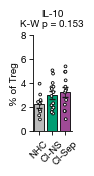

IFNγ - Kruskal-Wallis H-statistic: 1.99, p-value: 0.3688
IFNγ - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.695875  0.681044
CI-Sep  0.695875  1.000000  1.000000
NHC     0.681044  1.000000  1.000000



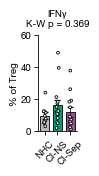

IL-17A - Kruskal-Wallis H-statistic: 5.37, p-value: 0.0683
IL-17A - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.727958  0.617038
CI-Sep  0.727958  1.000000  0.061737
NHC     0.617038  0.061737  1.000000



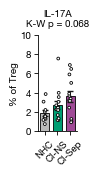

In [88]:
# Define the columns of interest and their labels with y-axis settings
cytokines_treg = {
    'pct_il10': ('IL-10', 0, 8, 2),
    'pct_ifng': ('IFNγ', 0, 60, 20),
    'pct_il17a': ('IL-17A', 0, 10, 2)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each cytokine to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in cytokines_treg.items():
    # Subset data for the current cytokine
    subset = df_reg[['Group', col]].copy()
    subset = subset.rename(columns={col: 'Percent'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['Percent'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='Percent', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('% of Treg', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on cytokine
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Treg_{label}_percent.svg', format='svg')

    # Show the figure
    plt.show()

IL-10 - Kruskal-Wallis H-statistic: 2.54, p-value: 0.2806
IL-10 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.505812  1.000000
CI-Sep  0.505812  1.000000  0.520478
NHC     1.000000  0.520478  1.000000



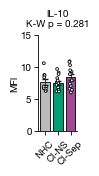

IFNγ - Kruskal-Wallis H-statistic: 1.31, p-value: 0.5185
IFNγ - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.924997
CI-Sep  1.000000  1.000000  0.930524
NHC     0.924997  0.930524  1.000000



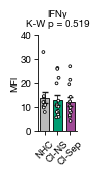

IL-17A - Kruskal-Wallis H-statistic: 4.72, p-value: 0.0942
IL-17A - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.583934  0.983189
CI-Sep  0.583934  1.000000  0.094426
NHC     0.983189  0.094426  1.000000



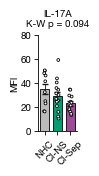

In [92]:
# Define the columns of interest and their labels with initial y-axis settings
cytokines_mfi_treg = {
    'mfi_il10': ('IL-10', 0, 15, 5),    # Adjusted y-axis range for IL-10
    'mfi_ifng': ('IFNγ', 0, 40, 10),
    'mfi_il17a': ('IL-17A', 0, 80, 20)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each cytokine to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in cytokines_mfi_treg.items():
    # Subset data for the current cytokine from df_reg
    subset = df_reg[['Group', col]].copy()
    subset = subset.rename(columns={col: 'MFI'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['MFI'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='MFI', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('MFI', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on cytokine
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['MFI'],
        subset[subset['Group'] == 'CI-NS']['MFI'],
        subset[subset['Group'] == 'CI-Sep']['MFI']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Treg_{label}_mfi.svg', format='svg')

    # Show the figure
    plt.show()

PD-1 - Kruskal-Wallis H-statistic: 23.64, p-value: 0.0000
PD-1 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.020120  0.049997
CI-Sep  0.020120  1.000000  0.000004
NHC     0.049997  0.000004  1.000000



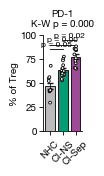

LAG-3 - Kruskal-Wallis H-statistic: 19.78, p-value: 0.0001
LAG-3 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.310769  0.008905
CI-Sep  0.310769  1.000000  0.000030
NHC     0.008905  0.000030  1.000000



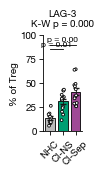

CD39 - Kruskal-Wallis H-statistic: 1.13, p-value: 0.5695
CD39 - Dunn’s Post-hoc Test Results:
        CI-NS    CI-Sep       NHC
CI-NS     1.0  1.000000  1.000000
CI-Sep    1.0  1.000000  0.871562
NHC       1.0  0.871562  1.000000



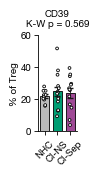

TIGIT - Kruskal-Wallis H-statistic: 3.50, p-value: 0.1735
TIGIT - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.244416
CI-Sep  1.000000  1.000000  0.355958
NHC     0.244416  0.355958  1.000000



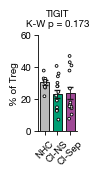

In [99]:
# Define the columns of interest and their labels with initial y-axis settings
functional_markers = {
    'pct_pd1': ('PD-1', 0, 100, 25),
    'pct_lag3': ('LAG-3', 0, 100, 25),
    'pct_cd39': ('CD39', 0, 60, 20),
    'pct_tigit': ('TIGIT', 0, 60, 20)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each functional marker to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in functional_markers.items():
    # Subset data for the current functional marker from df_reg
    subset = df_reg[['Group', col]].copy()
    subset = subset.rename(columns={col: 'Percent'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['Percent'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='Percent', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('% of Treg', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on functional marker
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['Percent'],
        subset[subset['Group'] == 'CI-NS']['Percent'],
        subset[subset['Group'] == 'CI-Sep']['Percent']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='Percent', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Treg_{label}_percent.svg', format='svg')

    # Show the figure
    plt.show()

PD-1 - Kruskal-Wallis H-statistic: 11.06, p-value: 0.0040
PD-1 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.157757  0.364986
CI-Sep  0.157757  1.000000  0.002916
NHC     0.364986  0.002916  1.000000



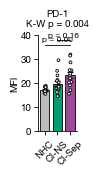

LAG-3 - Kruskal-Wallis H-statistic: 4.24, p-value: 0.1200
LAG-3 - Dunn’s Post-hoc Test Results:
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.167423
CI-Sep  1.000000  1.000000  0.254499
NHC     0.167423  0.254499  1.000000



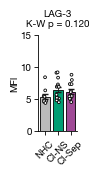

CD39 - Kruskal-Wallis H-statistic: 0.27, p-value: 0.8755
CD39 - Dunn’s Post-hoc Test Results:
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



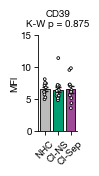

TIGIT - Kruskal-Wallis H-statistic: 1.76, p-value: 0.4143
TIGIT - Dunn’s Post-hoc Test Results:
           CI-NS  CI-Sep       NHC
CI-NS   1.000000     1.0  0.574734
CI-Sep  1.000000     1.0  1.000000
NHC     0.574734     1.0  1.000000



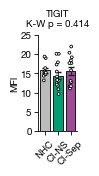

In [105]:
# Define the columns of interest and their labels with initial y-axis settings
functional_markers_mfi = {
    'mfi_pd1': ('PD-1', 0, 40, 10),
    'mfi_lag3': ('LAG-3', 0, 15, 5),
    'mfi_cd39': ('CD39', 0, 15, 5),
    'mfi_tigit': ('TIGIT', 0, 25, 5)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each functional marker to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in functional_markers_mfi.items():
    # Subset data for the current functional marker from df_reg
    subset = df_reg[['Group', col]].copy()
    subset = subset.rename(columns={col: 'MFI'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['MFI'].agg(['mean', sem]).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='MFI', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('MFI', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on functional marker
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['MFI'],
        subset[subset['Group'] == 'CI-NS']['MFI'],
        subset[subset['Group'] == 'CI-Sep']['MFI']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Treg_{label}_mfi.svg', format='svg')

    # Show the figure
    plt.show()

CD25 - Kruskal-Wallis H-statistic: 8.69, p-value: 0.0130
CD25 - Dunn’s Post-hoc Test Results:
          CI-NS    CI-Sep       NHC
CI-NS   1.00000  1.000000  0.051440
CI-Sep  1.00000  1.000000  0.015876
NHC     0.05144  0.015876  1.000000



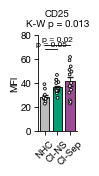

FOXP3 - Kruskal-Wallis H-statistic: 0.42, p-value: 0.8108
FOXP3 - Dunn’s Post-hoc Test Results:
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



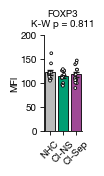

In [201]:
# Define the columns of interest and their labels with initial y-axis settings
functional_markers_mfi = {
    'mfi_cd25': ('CD25', 0, 80, 20),
    'mfi_foxp3': ('FOXP3', 0, 200, 50)
}

# Define custom colors for each group
colors = ['#BBBBBB', '#009E73', '#9F4A96']  # Gray for NHC, green for CI-NS, purple for CI-Sep

# Define group order
groups = ['NHC', 'CI-NS', 'CI-Sep']

# Iterate through each functional marker to create individual bar plots with SEM error bars
for col, (label, y_min, y_max, y_step) in functional_markers_mfi.items():
    # Subset data for the current functional marker from df_reg
    subset = df_reg[['Group', col]].copy()
    subset = subset.rename(columns={col: 'MFI'})
    
    # Calculate means and SEMs for each group
    mean_sem = subset.groupby('Group')['MFI'].agg(['mean', 'sem']).reindex(groups).reset_index()
    
    # Set up plot dimensions
    fig, ax = plt.subplots(figsize=(0.5, 1.25))

    # Set bar width and x-tick positions
    bar_width = 0.75
    x_positions = np.arange(len(mean_sem['Group']))

    # Plot bars with capped error bars for SEM
    ax.bar(x_positions, mean_sem['mean'], yerr=mean_sem['sem'], capsize=2, 
           color=colors, edgecolor='black', width=bar_width, error_kw={'elinewidth': 0.6})

    # Overlay individual data points using strip plot
    sns.stripplot(
        x='Group', y='MFI', data=subset, 
        order=groups, 
        jitter=True, marker='o', size=2, color='white', 
        edgecolor='black', linewidth=0.6, ax=ax
    )
    
    # Adjust x-ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels(groups, rotation=45, ha='center')
    ax.set_xlabel('')
    ax.set_ylabel('MFI', labelpad=1)
    ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
    ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

    # Set y-axis range and ticks based on functional marker
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max + y_step, y_step))

    # Perform Kruskal-Wallis test
    kw_stat, kw_pval = kruskal(
        subset[subset['Group'] == 'NHC']['MFI'],
        subset[subset['Group'] == 'CI-NS']['MFI'],
        subset[subset['Group'] == 'CI-Sep']['MFI']
    )
    print(f'{label} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Perform Dunn's post-hoc test
    posthoc_results = sp.posthoc_dunn(
        subset, val_col='MFI', group_col='Group', p_adjust='bonferroni'
    )
    print(f'{label} - Dunn’s Post-hoc Test Results:\n{posthoc_results}\n')
    
    # Add comparison bars if K-W p < 0.05
    if kw_pval < 0.05:
        base_y = y_max * 0.85  # Start position for comparison bars
        offset_increment = 0.05 * y_max  # Incremental offset for each comparison bar

        # Define pairs for pairwise comparison bars
        pair_positions = [(0, 1), (0, 2), (1, 2)]
        group_pairs = [('NHC', 'CI-NS'), ('NHC', 'CI-Sep'), ('CI-NS', 'CI-Sep')]

        # Iterate through pairs and add lines if Dunn's p < 0.25
        for idx, (start, end) in enumerate(pair_positions):
            p_val = posthoc_results.loc[group_pairs[idx][0], group_pairs[idx][1]]
            
            if p_val < 0.25:
                # Calculate the y-position for the current bar
                current_y = base_y + (idx * offset_increment)

                # Add comparison line
                ax.plot([start, end], [current_y, current_y], color='black', linewidth=0.6)
                
                # Add p-value text
                ax.text((start + end) / 2, current_y + (0.02 * y_max), f'p = {p_val:.2f}', 
                        ha='center', va='bottom', fontsize=6, color='black')

    # Set title with Kruskal-Wallis test p-value
    ax.set_title(f'{label}\nK-W p = {kw_pval:.3f}')

    # Save plots
    plt.savefig(f'{output_dir}Treg_{label}_mfi.svg', format='svg')

    # Show the figure
    plt.show()


TNFα - Kruskal-Wallis H-statistic: 4.03, p-value: 0.1334
TNFα - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.137603  1.000000
CI-Sep  0.137603  1.000000  0.777204
NHC     1.000000  0.777204  1.000000


IFNγ - Kruskal-Wallis H-statistic: 3.84, p-value: 0.1466
IFNγ - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.150553  1.000000
CI-Sep  0.150553  1.000000  0.966439
NHC     1.000000  0.966439  1.000000


IL-4 - Kruskal-Wallis H-statistic: 6.56, p-value: 0.0376
IL-4 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.038379
CI-Sep  1.000000  1.000000  0.162929
NHC     0.038379  0.162929  1.000000


IL-17A - Kruskal-Wallis H-statistic: 2.26, p-value: 0.3229
IL-17A - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS  CI-Sep       NHC
CI-NS   1.000000     1.0  0.402211
CI-Sep 

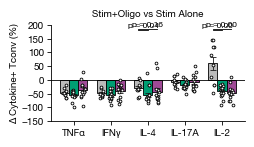

In [232]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_pct_markers_tconv = {
    'delta_pct_tnfa': 'TNFα',
    'delta_pct_ifng': 'IFNγ',
    'delta_pct_il4': 'IL-4',
    'delta_pct_il17a': 'IL-17A',
    'delta_pct_il2': 'IL-2'
}

# Reshape the DataFrame for plotting
df_long = df.melt(id_vars=['Group'], value_vars=delta_pct_markers_tconv.keys(), 
                  var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_pct_markers_tconv)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Define bar positions
num_markers = len(delta_pct_markers_tconv)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_pct_markers_tconv.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_pct_markers_tconv.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-150, 200)
ax.set_yticks(range(-150, 201, 50))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ Cytokine+ Tconv (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_pct_markers_tconv.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 180  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_pct_markers_tconv.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_pct_markers_tconv.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Tconv_cytokine-pct_delta.svg', format='svg')

# Show the plot
plt.show()


TNFα - Kruskal-Wallis H-statistic: 8.12, p-value: 0.0173
TNFα - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.299261  0.538824
CI-Sep  0.299261  1.000000  0.014041
NHC     0.538824  0.014041  1.000000


IFNγ - Kruskal-Wallis H-statistic: 0.88, p-value: 0.6427
IFNγ - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0


IL-4 - Kruskal-Wallis H-statistic: 1.71, p-value: 0.4256
IL-4 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS  CI-Sep       NHC
CI-NS   1.000000     1.0  0.583546
CI-Sep  1.000000     1.0  1.000000
NHC     0.583546     1.0  1.000000


IL-17A - Kruskal-Wallis H-statistic: 6.41, p-value: 0.0405
IL-17A - Dunn's post-hoc test (Bonferroni-adjusted p-values):
          CI-NS    CI-Sep       NHC
CI-NS   1.00000  1.000000  0.123090
CI-Sep  1.00000  1.000000  0.049532
NHC     0.12309  

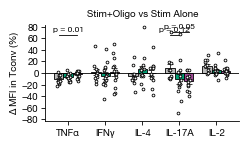

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import scikit_posthocs as sp
from scipy.stats import kruskal

# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_tconv = {
    'delta_mfi_tnfa': 'TNFα',
    'delta_mfi_ifng': 'IFNγ',
    'delta_mfi_il4': 'IL-4',
    'delta_mfi_il17a': 'IL-17A',
    'delta_mfi_il2': 'IL-2'
}

# Reshape the DataFrame for plotting
df_long = df.melt(id_vars=['Group'], value_vars=delta_mfi_markers_tconv.keys(), 
                  var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_tconv)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(2.5, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_tconv)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_tconv.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_tconv.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-83, 83)
ax.set_yticks(range(-80, 81, 20))

# Set axis labels
ax.set_xlabel('', labelpad=0)
ax.set_ylabel('Δ MFI in Tconv (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_tconv.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 65  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_tconv.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_tconv.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Tconv_cytokine-mfi_delta.svg', format='svg')

# Show the plot
plt.show()


IL-10 - Kruskal-Wallis H-statistic: 2.96, p-value: 0.2282
IL-10 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.893437  0.273425
CI-Sep  0.893437  1.000000  1.000000
NHC     0.273425  1.000000  1.000000


IFNγ - Kruskal-Wallis H-statistic: 7.36, p-value: 0.0252
IFNγ - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.020862  0.438232
CI-Sep  0.020862  1.000000  0.893986
NHC     0.438232  0.893986  1.000000


IL-17A - Kruskal-Wallis H-statistic: 0.22, p-value: 0.8954
IL-17A - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



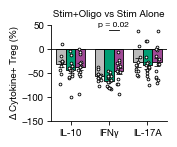

In [234]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_pct_markers_treg = {
    'delta_pct_il10': 'IL-10',
    'delta_pct_ifng': 'IFNγ',
    'delta_pct_il17a': 'IL-17A'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_pct_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_pct_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.5, 1.25))  # Adjusted width to 1.5

# Define bar positions
num_markers = len(delta_pct_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_pct_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_pct_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-150, 50)
ax.set_yticks(range(-150, 51, 50))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ Cytokine+ Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_pct_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 40  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_pct_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_pct_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_cytokine-pct_delta.svg', format='svg')

# Show the plot
plt.show()


IL-10 - Kruskal-Wallis H-statistic: nan, p-value: nan
IL-10 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0


IFNγ - Kruskal-Wallis H-statistic: 0.23, p-value: 0.8908
IFNγ - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0


IL-17A - Kruskal-Wallis H-statistic: 1.04, p-value: 0.5935
IL-17A - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS  CI-Sep  NHC
CI-NS     1.0     1.0  1.0
CI-Sep    1.0     1.0  1.0
NHC       1.0     1.0  1.0



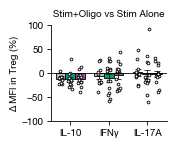

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_treg = {
    'delta_mfi_il10': 'IL-10',
    'delta_mfi_ifng': 'IFNγ',
    'delta_mfi_il17a': 'IL-17A'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_mfi_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.5, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-100, 100)
ax.set_yticks(range(-100, 101, 50))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ MFI in Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 40  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_cytokine-mfi_delta.svg', format='svg')

# Show the plot
plt.show()


CD39 - Kruskal-Wallis H-statistic: 2.26, p-value: 0.3230
CD39 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
          CI-NS  CI-Sep      NHC
CI-NS   1.00000     1.0  0.40477
CI-Sep  1.00000     1.0  1.00000
NHC     0.40477     1.0  1.00000


TIGIT - Kruskal-Wallis H-statistic: 12.89, p-value: 0.0016
TIGIT - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.013529
CI-Sep  1.000000  1.000000  0.001824
NHC     0.013529  0.001824  1.000000



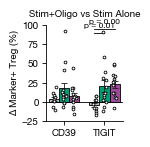

In [240]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_pct_markers_treg = {
    'delta_pct_cd39': 'CD39',
    'delta_pct_tigit': 'TIGIT'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_pct_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_pct_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.0, 1.25))

# Define bar positions
num_markers = len(delta_pct_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_pct_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_pct_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-25, 100)
ax.set_yticks(range(-25, 101, 25))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ Marker+ Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_pct_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 90  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_pct_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_pct_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_function-pct_delta.svg', format='svg')

# Show the plot
plt.show()


CD39 - Kruskal-Wallis H-statistic: 2.17, p-value: 0.3385
CD39 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
        CI-NS    CI-Sep       NHC
CI-NS     1.0  1.000000  1.000000
CI-Sep    1.0  1.000000  0.427536
NHC       1.0  0.427536  1.000000


TIGIT - Kruskal-Wallis H-statistic: 3.42, p-value: 0.1813
TIGIT - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.316161
CI-Sep  1.000000  1.000000  0.291284
NHC     0.316161  0.291284  1.000000



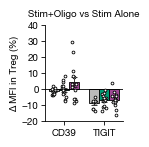

In [44]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_treg = {
    'delta_mfi_cd39': 'CD39',
    'delta_mfi_tigit': 'TIGIT'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_mfi_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.0, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-20, 40)
ax.set_yticks(range(-20, 41, 10))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ MFI in Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 90  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_function-mfi_delta.svg', format='svg')

# Show the plot
plt.show()


CD25 - Kruskal-Wallis H-statistic: 4.72, p-value: 0.0945
CD25 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.832511  0.695869
CI-Sep  0.832511  1.000000  0.089787
NHC     0.695869  0.089787  1.000000


FOXP3 - Kruskal-Wallis H-statistic: 13.44, p-value: 0.0012
FOXP3 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS   CI-Sep       NHC
CI-NS   1.000000  1.00000  0.016171
CI-Sep  1.000000  1.00000  0.001150
NHC     0.016171  0.00115  1.000000



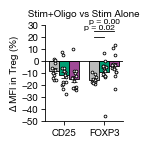

In [238]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_treg = {
    'delta_mfi_cd25': 'CD25',
    'delta_mfi_foxp3': 'FOXP3'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_mfi_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.0, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-50, 30)
ax.set_yticks(range(-50, 31, 10))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ MFI in Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 20  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_markers-mfi_delta.svg', format='svg')

# Show the plot
plt.show()


PD-1 - Kruskal-Wallis H-statistic: 7.42, p-value: 0.0245
PD-1 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
          CI-NS    CI-Sep       NHC
CI-NS   1.00000  1.000000  0.022990
CI-Sep  1.00000  1.000000  0.140771
NHC     0.02299  0.140771  1.000000


LAG-3 - Kruskal-Wallis H-statistic: 11.52, p-value: 0.0032
LAG-3 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.307489  0.002085
CI-Sep  0.307489  1.000000  0.195872
NHC     0.002085  0.195872  1.000000



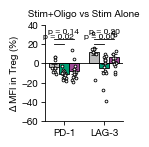

In [37]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_treg = {
    'delta_mfi_pd1': 'PD-1',
    'delta_mfi_lag3': 'LAG-3'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_mfi_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.0, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-60, 40)
ax.set_yticks(range(-60, 41, 20))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ MFI in Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 20  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_markers-mfi_PD1_LAG3.svg', format='svg')

# Show the plot
plt.show()


PD-1 - Kruskal-Wallis H-statistic: 6.23, p-value: 0.0445
PD-1 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.169053  0.065742
CI-Sep  0.169053  1.000000  1.000000
NHC     0.065742  1.000000  1.000000


LAG-3 - Kruskal-Wallis H-statistic: 17.71, p-value: 0.0001
LAG-3 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.000413
CI-Sep  1.000000  1.000000  0.000794
NHC     0.000413  0.000794  1.000000



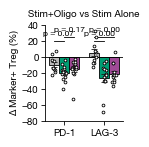

In [35]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_pct_markers_treg = {
    'delta_pct_pd1': 'PD-1',
    'delta_pct_lag3': 'LAG-3'
}

# Reshape the DataFrame for plotting
df_long = df_reg.melt(id_vars=['Group'], value_vars=delta_pct_markers_treg.keys(), 
                      var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_pct_markers_treg)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.0, 1.25))

# Define bar positions
num_markers = len(delta_pct_markers_treg)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_pct_markers_treg.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_pct_markers_treg.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-80, 40)
ax.set_yticks(range(-80, 41, 20))

# Set axis labels
ax.set_xlabel('')
ax.set_ylabel('Δ Marker+ Treg (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_pct_markers_treg.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 20  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_pct_markers_treg.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_pct_markers_treg.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Treg_markers-delta_pct_PD1_LAG3.svg', format='svg')

# Show the plot
plt.show()


CD25 - Kruskal-Wallis H-statistic: 3.71, p-value: 0.1562
CD25 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.212125
CI-Sep  1.000000  1.000000  0.339058
NHC     0.212125  0.339058  1.000000


PD-1 - Kruskal-Wallis H-statistic: 7.88, p-value: 0.0195
PD-1 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
          CI-NS    CI-Sep       NHC
CI-NS   1.00000  1.000000  0.031150
CI-Sep  1.00000  1.000000  0.047956
NHC     0.03115  0.047956  1.000000


LAG-3 - Kruskal-Wallis H-statistic: 15.00, p-value: 0.0006
LAG-3 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.006854
CI-Sep  1.000000  1.000000  0.000634
NHC     0.006854  0.000634  1.000000



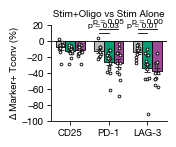

In [33]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_pct_markers_tconv = {
    'delta_pct_cd25': 'CD25',
    'delta_pct_pd1': 'PD-1',
    'delta_pct_lag3': 'LAG-3'
}

# Reshape the DataFrame for plotting
df_long = df.melt(id_vars=['Group'], value_vars=delta_pct_markers_tconv.keys(), 
                  var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_pct_markers_tconv)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.5, 1.25))

# Define bar positions
num_markers = len(delta_pct_markers_tconv)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_pct_markers_tconv.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_pct_markers_tconv.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-100, 20)
ax.set_yticks(range(-100, 21, 20))

# Set axis labels
ax.set_xlabel('', labelpad=0)
ax.set_ylabel('Δ Marker+ Tconv (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_pct_markers_tconv.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 10  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_pct_markers_tconv.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_pct_markers_tconv.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Tconv_markers-delta_pct_CD25_PD1_LAG3.svg', format='svg')

# Show the plot
plt.show()



CD25 - Kruskal-Wallis H-statistic: 19.49, p-value: 0.0001
CD25 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.000543
CI-Sep  1.000000  1.000000  0.000144
NHC     0.000543  0.000144  1.000000


PD-1 - Kruskal-Wallis H-statistic: 10.22, p-value: 0.0060
PD-1 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  0.725653  0.004352
CI-Sep  0.725653  1.000000  0.117367
NHC     0.004352  0.117367  1.000000


LAG-3 - Kruskal-Wallis H-statistic: 17.41, p-value: 0.0002
LAG-3 - Dunn's post-hoc test (Bonferroni-adjusted p-values):
           CI-NS    CI-Sep       NHC
CI-NS   1.000000  1.000000  0.000621
CI-Sep  1.000000  1.000000  0.000664
NHC     0.000621  0.000664  1.000000



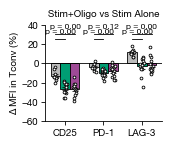

In [32]:
# Define the groups and color scheme
group_order = ['NHC', 'CI-NS', 'CI-Sep']
group_palette = {'NHC': '#BBBBBB', 'CI-NS': '#009E73', 'CI-Sep': '#9F4A96'}

# Define the markers of interest with readable labels
delta_mfi_markers_tconv = {
    'delta_mfi_cd25': 'CD25',
    'delta_mfi_pd1': 'PD-1',
    'delta_mfi_lag3': 'LAG-3'
}

# Reshape the DataFrame for plotting
df_long = df.melt(id_vars=['Group'], value_vars=delta_mfi_markers_tconv.keys(), 
                  var_name='Marker', value_name='Delta')
df_long['Marker'] = df_long['Marker'].map(delta_mfi_markers_tconv)

# Calculate means and SEMs for error bars
means_sems = df_long.groupby(['Group', 'Marker'])['Delta'].agg(['mean', 'sem']).reset_index()

# Set figure size
fig, ax = plt.subplots(figsize=(1.5, 1.25))

# Define bar positions
num_markers = len(delta_mfi_markers_tconv)
bar_width = 0.25
x = np.arange(num_markers)

# Plot bars for each group, ordered by x-axis labels
for i, marker in enumerate(delta_mfi_markers_tconv.values()):
    for j, group in enumerate(group_order):
        # Select the mean and SEM for the current group and marker
        mean_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['mean'].values[0]
        sem_val = means_sems[(means_sems['Group'] == group) & (means_sems['Marker'] == marker)]['sem'].values[0]

        # Calculate the bar position
        bar_position = x[i] + j * bar_width - bar_width

        # Plot the bar
        ax.bar(
            bar_position, mean_val, yerr=sem_val, width=bar_width, 
            label=group if i == 0 else "", color=group_palette[group], 
            edgecolor='black', capsize=2, error_kw={'elinewidth': 0.6, 'capthick': 0.6}
        )

        # Overlay individual data points with jitter
        subset = df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]
        jitter = (np.random.rand(len(subset)) - 0.5) * 0.1  # Jitter for visualization

        # Adjust x-coordinates to match the corresponding bars
        x_coords = [bar_position + jitter_val for jitter_val in jitter]
        ax.scatter(
            x_coords, subset['Delta'], color='white', edgecolor='black', 
            s=4, linewidth=0.6, zorder=3
        )

# Add a solid horizontal line at y=0
ax.axhline(0, color='black', linewidth=0.6)

# Set x-ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(delta_mfi_markers_tconv.values(), rotation=0, ha='center')

# Set y-axis limits and ticks
ax.set_ylim(-60, 40)
ax.set_yticks(range(-60, 41, 20))

# Set axis labels
ax.set_xlabel('', labelpad=0)
ax.set_ylabel('Δ MFI in Tconv (%)', labelpad=2)

# Add the title
ax.set_title('Stim+Oligo vs Stim Alone')

# Adjust padding for x and y ticks
ax.tick_params(axis='y', direction='out', length=3, width=0.6, colors='black', pad=2)
ax.tick_params(axis='x', direction='out', length=3, width=0.6, colors='black', pad=2)

# Perform Kruskal-Wallis test and Dunn's post-hoc test for each marker
for marker in delta_mfi_markers_tconv.values():
    subsets = [df_long[(df_long['Group'] == group) & (df_long['Marker'] == marker)]['Delta'] for group in group_order]
    kw_stat, kw_pval = kruskal(*subsets)
    print(f'\n{marker} - Kruskal-Wallis H-statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}')
    
    # Always perform Dunn's post-hoc test
    dunn_results = sp.posthoc_dunn(
        df_long[df_long['Marker'] == marker], 
        val_col='Delta', group_col='Group', p_adjust='bonferroni'
    )
    
    # Display Dunn's test results in table format
    print(f"{marker} - Dunn's post-hoc test (Bonferroni-adjusted p-values):\n{dunn_results}\n")
    
    # Add comparison bars and p-values for significant results (K-W p < 0.05 and Dunn's p < 0.25)
    if kw_pval < 0.05:
        offset_increment = 5  # Adjust to prevent overlapping
        current_y_pos = 25  # Start position for comparison lines

        for i, group1 in enumerate(group_order):
            for j, group2 in enumerate(group_order):
                if i < j:  # Only consider each pair once
                    p_val = dunn_results.loc[group1, group2]
                    if p_val < 0.25:
                        # Calculate bar positions for comparison lines
                        x_start = x[list(delta_mfi_markers_tconv.values()).index(marker)] + i * bar_width - bar_width
                        x_end = x[list(delta_mfi_markers_tconv.values()).index(marker)] + j * bar_width - bar_width
                        y_pos = current_y_pos

                        # Add the comparison line
                        ax.plot([x_start, x_end], [y_pos, y_pos], color='black', linewidth=0.6)
                        
                        # Add p-value text above the bar
                        ax.text((x_start + x_end) / 2, y_pos + 5, f'p = {p_val:.2f}', 
                                ha='center', va='bottom', fontsize=6, color='black')

                        # Update current y-position for the next comparison line
                        current_y_pos += offset_increment

# Remove legend for now
ax.legend([], [], frameon=False)

# Save the plot
plt.savefig('Tconv_markers-delta_mfi_CD25_PD1_LAG3.svg', format='svg')

# Show the plot
plt.show()